### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

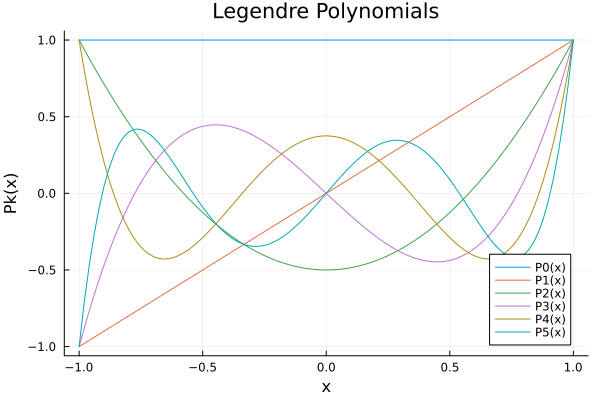

In [ ]:
using Polynomials
using Plots

# Wielomiany Legendre'a
function P(k)
    if k == 0
        return Polynomial([1])
    end
    if k == 1
        return Polynomial([0,1])
    end
    return (2*k - 1) / k * Polynomial([0,1]) * P(k-1) - (k-1) / k * P(k-2)
end

# Rysujemy wykresy dla wielomianów do 5 stopnia
num = 5

plot()
for k in 0:num
    xs = range(-1, 1, 100)
    ys = P(k).(xs)
    plot!(xs, ys, label="P$k(x)")
end

xlabel!("x")
ylabel!("Pk(x)")
title!("Legendre Polynomials")

In [ ]:
using QuadGK

# Porównujemy zera wielomianów z odciętymi punktów Gaussa
for k in 2:4
    print(roots(P(k))) # zera wielomianów
    print(" == ")
    (xp, a) = gauss(Float64, k) 
    println(xp) # odcięte punktów Gaussa
end

[-0.5773502691896258, 0.5773502691896256] == [-0.5773502691896258, 0.5773502691896258]
[-0.7745966692414834, 0.7745966692414835, 0.0] == [-0.7745966692414834, 0.0, 0.7745966692414834]
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531] == [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


#### Podstawowe twierdzenie kwadratur Gaussa

Odcięte $ x_i $ n-punktowej kwadratury Gaussa z funkcją ważącą $ w(x) $ w $ [a, b] $ są zerami wielomianu ortogonalnego $ φ_n(x) $ dla tego samego przedziału i tej samej funkcji ważącej.

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [ ]:
using Polynomials
using QuadGK

function integral(k, f)
    (xp, a) = gauss(Float64, k)
    sum(a .* f.(xp)) 
end

k = 4
num = 15
polynomials = [[if j != i  0 else i end for i in 1:j] for j in 1:num] # wielomiany coraz większych stopni

for polynomial in polynomials
    poly = Polynomial(polynomial)
    print(poly)
    print("   ")
    print(integral(k, poly))
    print("   ")
    println(1^length(polynomial) - ((-1)^length(polynomial))) # wartość oczekiwana
end

1   2.0   2
2*x   -1.1102230246251565e-16   0
3*x^2   2.0000000000000004   2
4*x^3   0.0   0
5*x^4   2.000000000000001   2
6*x^5   0.0   0
7*x^6   2.000000000000001   2
8*x^7   0.0   0
9*x^8   1.8955102040816336   2
10*x^9   0.0   0
11*x^10   1.7163848396501462   2
12*x^11   0.0   0
13*x^12   1.5039933361099547   2
14*x^13   0.0   0
15*x^14   1.286849526982805   2


Funkcja przestaje być dokładna dla wielomianu stopnia 8

Twierdzenie o stopniu dokładności kwadratury Gaussa mówi, że dla n-punktowej kwadratury, kwadratura ma stopień dokładności równy 2n-1.
Kwadratura o stopniu 4 przestaje być dokładna od wielomianu stopnia 7.

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [ ]:
function integral2(a, b, k, f)
    F(z) = f((b + a) / 2 + (b - a) / 2 * z) * (b - a) / 2
    integral(k, F)
end

# testujemy działanie
g(x) = x^2

print(integral2(1, 2, 7, g))
print(" == ")
println("2.(3)") # wartość oczekiwana

print(integral2(-10, 10, 7, g))
print(" == ")
println("666.(6)") # wartość oczekiwana

u(x) = sin(x) + x^7 + 3

print(integral2(1, 2, 7, u))
print(" == ")
println("35.83144914241528") # wartość oczekiwana

2.333333333333333 == 2.(3)
666.6666666666671 == 666.(6)
35.83144914241529 == 35.83144914241528


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [ ]:
using QuadGK

t(x) = cos(200x)

integral_value, error = quadgk(t, 0, 1)
println(integral_value) # całka przykładowego wielomianu

p(x) = 1 / sqrt(2 * pi) * exp(x^2 / -2)

integral_value, error = quadgk(p, -Inf, +Inf)
println(integral_value) # całka standardowego rozkładu normalnego Gaussa

-0.004366486486069925
1.0000000000032583


### Zadanie 5 (3p)
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)


In [ ]:
function rectangle(f, a, b, n)
    h = (b - a) / n
    sum = 0
    for i in 0:n-1
        sum += h * f(a + (i+0.5)*h)
    end
    return sum
end

function trapeze(f, a, b, n)
    h = (b - a) / n
    sum = 0
    for i in 0:n-1
        sum += h * (f(a + i*h) + f(a + (i+1)*h)) / 2
    end
    return sum
end

function simpson(f, a, b, n)
    h = (b - a) / n
    sum = 0
    for i in 0:n-1
        sum += h / 6 * (f(a + i*h) + f(a + (i+1)*h) + 4*f(a + (i+0.5)*h))
    end
    return sum
end  

simpson (generic function with 1 method)

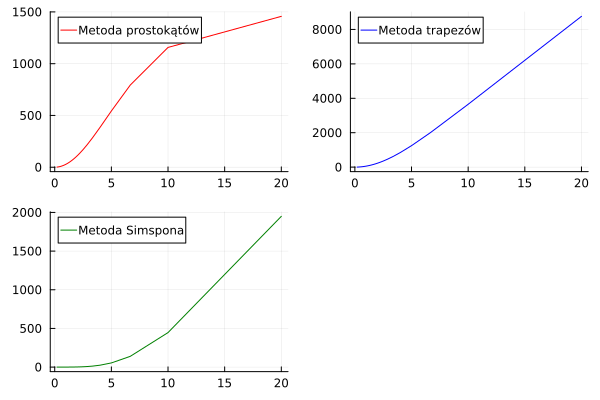

In [ ]:
f1(x) = 2^x # testowana funkcja wykładnicza
# przedział całkowania
a = -10
b = 10
expected = 1477.318312988423 # wartość oczekiwana

h_value = Vector{Float64}()
rectangleError = Vector{Float64}()
trapezzeError = Vector{Float64}()
simpsonError = Vector{Float64}()

# Mierzymy błąd dla n od 1 do 100
for n in 1:100
    append!(h_value, (b - a) / n)
    append!(rectangleError, abs(expected - rectangle(f1, a, b, n)))
    append!(trapezzeError, abs(expected - trapeze(f1, a, b, n)))
    append!(simpsonError, abs(expected - simpson(f1, a, b, n)))
end

# Rysujemy wykres
plot(h_value, [rectangleError, trapezzeError, simpsonError], label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"], color = ["red" "blue" "green"], layout=3)

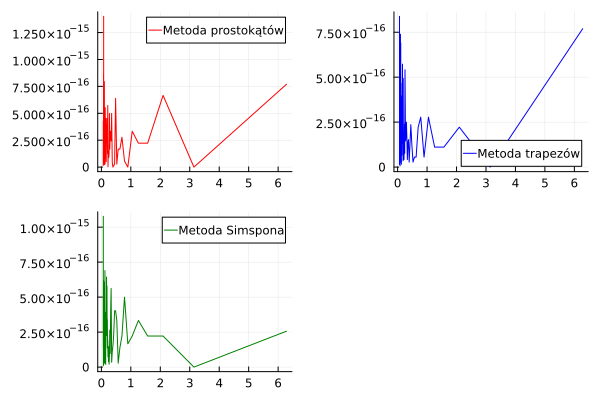

In [ ]:
f2(x) = sin(x) # testowana funkcja trygonometryczna
a2 = 0
b2 = 2*pi
expected2 = 0

h_value2 = Vector{Float64}()
rectangleError2 = Vector{Float64}()
trapezzeError2 = Vector{Float64}()
simpsonError2 = Vector{Float64}()

for n2 in 1:100
    append!(h_value2, (b2 - a2) / n2)
    append!(rectangleError2, abs(expected2 - rectangle(f2, a2, b2, n2)))
    append!(trapezzeError2, abs(expected2 - trapeze(f2, a2, b2, n2)))
    append!(simpsonError2, abs(expected2 - simpson(f2, a2, b2, n2)))
end

plot(h_value2, [rectangleError2, trapezzeError2, simpsonError2], label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"], color = ["red" "blue" "green"], layout=3)